In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import inspect
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import csv

## Load files

In [2]:
df = pandas.read_excel('../data/globalterrorismdb_0616dist.xlsx')

In [3]:
df_15_16 = pandas.read_excel('../data/Global Terrorism Database 2015-2016 Preliminary Data EMBARGOED.xlsx') 

In [4]:
# is the newest 2015 data same as last?
print df[df.iyear==2015].eventid.count()
print df_15_16[df_15_16.iyear==2015].eventid.count()

14806
14843


In [5]:
#let's use the latest 2015
df = pandas.concat([df[df.iyear < 2015], df_15_16])

Check basic stats

In [18]:
print df.eventid.count()
print df.iyear.unique()

170255
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982 1983
 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]


## Analyze looking at long tails

In [22]:
df[(df.iyear > 2006)&(df.nkill > 100)].groupby(["gname"]).eventid.count().sort_values(ascending=False)

gname
Islamic State of Iraq and the Levant (ISIL)                   24
Boko Haram                                                    20
Unknown                                                        6
Al-Shabaab                                                     4
Donetsk People's Republic                                      3
Taliban                                                        3
Al-Qaida in Iraq                                               3
Tehrik-i-Taliban Pakistan (TTP)                                3
Sudan People's Liberation Movement in Opposition (SPLM-IO)     2
Al-Qaida in the Arabian Peninsula (AQAP)                       2
Ansar al-Din Front                                             1
Communist Party of India - Maoist (CPI-Maoist)                 1
David Yau Yau Militia                                          1
Islamic State of Iraq (ISI)                                    1
Fulani Militants                                               1
Harkatul Jihad-e-Is

### Deadliest attacks by ISIL

In [36]:
df[(df.iyear > 2006)&(df.gname=='Islamic State of Iraq and the Levant (ISIL)')].sort_values('nkill', ascending=False)[['gname','nkill','attacktype1_txt']][:20]

,gname,nkill,attacktype1_txt
133286,Islamic State of Iraq and the Levant (ISIL),1500.0,Hostage Taking (Kidnapping)
132993,Islamic State of Iraq and the Levant (ISIL),670.0,Armed Assault
136503,Islamic State of Iraq and the Levant (ISIL),517.0,Hostage Taking (Kidnapping)
136045,Islamic State of Iraq and the Levant (ISIL),500.0,Hostage Taking (Kidnapping)
27719,Islamic State of Iraq and the Levant (ISIL),421.0,Hostage Taking (Kidnapping)
21920,Islamic State of Iraq and the Levant (ISIL),383.0,Bombing/Explosion
134879,Islamic State of Iraq and the Levant (ISIL),310.0,Hostage Taking (Kidnapping)
4304,Islamic State of Iraq and the Levant (ISIL),300.0,Hostage Taking (Kidnapping)
16286,Islamic State of Iraq and the Levant (ISIL),300.0,Hostage Taking (Kidnapping)
25927,Islamic State of Iraq and the Levant (ISIL),284.0,Hostage Taking (Kidnapping)


### Deadliest attacks in last 10 years

In [40]:
df[(df.iyear > 2006)].sort_values('nkill', ascending=False)[['iyear','imonth','iday','gname','nkill','attacktype1_txt']][:20]

,iyear,imonth,iday,gname,nkill,attacktype1_txt
133286,2014,6,12,Islamic State of Iraq and the Levant (ISIL),1500.0,Hostage Taking (Kidnapping)
132993,2014,6,10,Islamic State of Iraq and the Levant (ISIL),670.0,Armed Assault
136503,2014,8,19,Islamic State of Iraq and the Levant (ISIL),517.0,Hostage Taking (Kidnapping)
136045,2014,8,3,Islamic State of Iraq and the Levant (ISIL),500.0,Hostage Taking (Kidnapping)
27719,2016,12,10,Islamic State of Iraq and the Levant (ISIL),421.0,Hostage Taking (Kidnapping)
90276,2009,1,17,Lord's Resistance Army (LRA),400.0,Facility/Infrastructure Attack
21920,2016,7,3,Islamic State of Iraq and the Levant (ISIL),383.0,Bombing/Explosion
131118,2014,5,5,Boko Haram,315.0,Armed Assault
134879,2014,7,17,Islamic State of Iraq and the Levant (ISIL),310.0,Hostage Taking (Kidnapping)
4304,2015,4,9,Islamic State of Iraq and the Levant (ISIL),300.0,Hostage Taking (Kidnapping)


### Deadliest attacks by genre (last 10 years)

#### Cumulatively deadliest type of attack, past 10 years

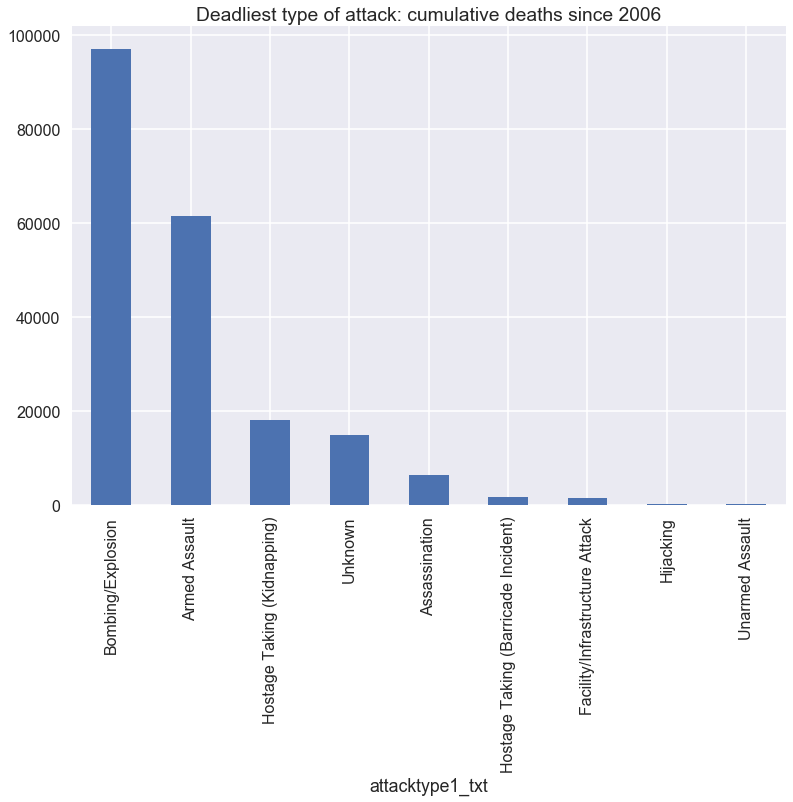

In [53]:
df[(df.iyear > 2006)].groupby('attacktype1_txt').nkill.sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Deadliest type of attack: cumulative deaths since 2006")

In [54]:
df[(df.iyear > 2006)].groupby('attacktype1_txt').nkill.sum().sort_values(ascending=False)

attacktype1_txt
Bombing/Explosion                      96997.60
Armed Assault                          61552.97
Hostage Taking (Kidnapping)            18026.25
Unknown                                14877.84
Assassination                           6412.33
Hostage Taking (Barricade Incident)     1747.00
Facility/Infrastructure Attack          1522.01
Hijacking                                144.00
Unarmed Assault                          140.00
Name: nkill, dtype: float64

#### Kind of attack with highest number of deaths per attack

In [61]:
df[(df.iyear > 2006)].groupby('attacktype1_txt').nkill.mean().sort_values(ascending=False)

attacktype1_txt
Hostage Taking (Barricade Incident)    7.434043
Unknown                                4.832036
Hostage Taking (Kidnapping)            3.902630
Armed Assault                          3.026798
Bombing/Explosion                      2.080377
Assassination                          1.226301
Hijacking                              0.774194
Unarmed Assault                        0.382514
Facility/Infrastructure Attack         0.359898
Name: nkill, dtype: float64

In [55]:
df[(df.iyear > 2006)].sort_values('nkill', ascending=False)[['iyear','imonth','iday','gname','nkill','attacktype1_txt']][:20]

,iyear,imonth,iday,gname,nkill,attacktype1_txt
133286,2014,6,12,Islamic State of Iraq and the Levant (ISIL),1500.0,Hostage Taking (Kidnapping)
132993,2014,6,10,Islamic State of Iraq and the Levant (ISIL),670.0,Armed Assault
136503,2014,8,19,Islamic State of Iraq and the Levant (ISIL),517.0,Hostage Taking (Kidnapping)
136045,2014,8,3,Islamic State of Iraq and the Levant (ISIL),500.0,Hostage Taking (Kidnapping)
27719,2016,12,10,Islamic State of Iraq and the Levant (ISIL),421.0,Hostage Taking (Kidnapping)
90276,2009,1,17,Lord's Resistance Army (LRA),400.0,Facility/Infrastructure Attack
21920,2016,7,3,Islamic State of Iraq and the Levant (ISIL),383.0,Bombing/Explosion
131118,2014,5,5,Boko Haram,315.0,Armed Assault
134879,2014,7,17,Islamic State of Iraq and the Levant (ISIL),310.0,Hostage Taking (Kidnapping)
4304,2015,4,9,Islamic State of Iraq and the Levant (ISIL),300.0,Hostage Taking (Kidnapping)


In [54]:
df[(df.iyear > 2006)].groupby('attacktype1_txt').nkill.sum().sort_values(ascending=False)

attacktype1_txt
Bombing/Explosion                      96997.60
Armed Assault                          61552.97
Hostage Taking (Kidnapping)            18026.25
Unknown                                14877.84
Assassination                           6412.33
Hostage Taking (Barricade Incident)     1747.00
Facility/Infrastructure Attack          1522.01
Hijacking                                144.00
Unarmed Assault                          140.00
Name: nkill, dtype: float64

### Deadliest group (last 10 years)

In [68]:
df[(df.iyear > 2006)].groupby('gname').nkill.sum().sort_values(ascending=False)[:10]

gname
Unknown                                        60655.67
Islamic State of Iraq and the Levant (ISIL)    30815.33
Taliban                                        23289.00
Boko Haram                                     18530.00
Al-Shabaab                                      7339.00
Tehrik-i-Taliban Pakistan (TTP)                 5685.00
Al-Qaida in Iraq                                3382.80
Al-Qaida in the Arabian Peninsula (AQAP)        3353.00
Al-Nusrah Front                                 2954.00
Fulani Militants                                2727.00
Name: nkill, dtype: float64

### Deadliest group 2016

In [71]:
df[(df.iyear > 2015)].groupby('gname').nkill.sum().sort_values(ascending=False)[:10]

gname
Islamic State of Iraq and the Levant (ISIL)                   11570.0
Unknown                                                        5666.0
Taliban                                                        5025.0
Al-Shabaab                                                     1535.0
Boko Haram                                                     1437.0
Huthi Extremists                                                856.0
Fulani Militants                                                819.0
Khorasan Chapter of the Islamic State                           664.0
Kurdistan Workers' Party (PKK)                                  583.0
Sudan People's Liberation Movement in Opposition (SPLM-IO)      404.0
Name: nkill, dtype: float64

### Deadliest group on average (too few rows)

In [72]:
df[(df.iyear > 2006)].groupby('gname').nkill.mean().sort_values(ascending=False)[:10]

gname
Ansar al-Din Front                                                          103.000000
Agwelek Forces                                                               56.000000
Kata'ib Hezbollah                                                            49.000000
Jaish al-Sunnah                                                              43.000000
Popular Front for the Renaissance of the Central African Republic (FPRC)     42.500000
Islamic Movement for the Liberation of Raja                                  42.000000
Liwa al-Haqq                                                                 40.000000
Tehrik-e-Taliban Islami (TTI)                                                40.000000
David Yau Yau Militia                                                        36.333333
Kokang                                                                       34.000000
Name: nkill, dtype: float64

In [76]:
df[(df.iyear > 2006)&(df.gname=='Ansar al-Din Front')].sort_values('nkill').nkill

2417      6.0
4974    200.0
Name: nkill, dtype: float64